# Regressão Linear - Univariada

In [352]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

data = pd.read_csv('ex1data1.txt', header=None, names=['feature', 'label'])
data.head()

,feature,label
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


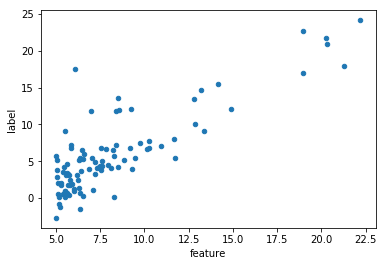

In [353]:
data.plot(kind='scatter', x='feature', y='label')

#### Conforme o gráfico acima, percebemos uma relação linear entre o preditor e o resultado. Logo, possivelmente a regressão linear seja um ótimo modelo.

In [354]:
data.corr()

,feature,label
feature,1.000000,0.837873
label,0.837873,1.000000


#### Além disso, calculando a correlação de pearson, o qual mede a correlação linear entre as variáveis, percebemos uma alta correlação entre a feature e label

In [355]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

eta = 0.001
epochs = 1000

# xTrain, xTest, yTrain, yTest = train_test_split(data['feature'], data['label'], test_size=0.3, random_state=10)

sgdRegressor = SGDRegressor(learning_rate='constant', eta0=eta, n_iter=epochs, random_state=10)
sgdRegressor.fit(data['feature'].values.reshape(-1,1), data['label'])

xTestReshaped = xTest.values.reshape(-1, 1)
predicts = sgdRegressor.predict(xTestReshaped)

In [361]:
print(sgdRegressor.intercept_)
print(sgdRegressor.coef_)

[-3.92593757]
[ 1.21292742]


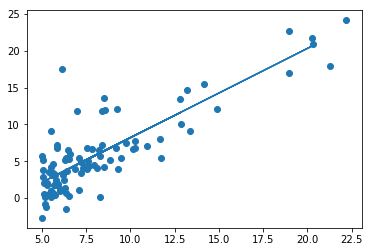

In [357]:
plt.scatter(data['feature'], data['label'])
plt.plot(xTest, predicts, '-')

Coeficientes: [-3.80706676  1.01980598]


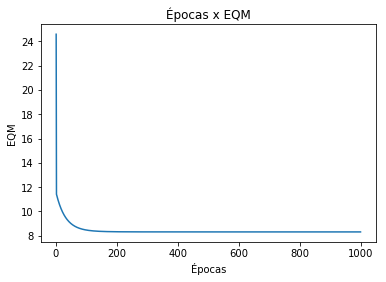

In [362]:
from sklearn.utils import shuffle

eta = 0.001
errors = []

def predict(X, theta):
    return theta[0] + np.dot(X, theta[1:])

def sgd(X, y, eta, epochs):
    theta = np.random.randn(1 + xTestReshaped.shape[1])

    for epoch in range(epochs):
        sum_error = 0
        
        for f, target in zip(X,y):
            ypred = predict(f, theta)
            error = target - ypred[0]
            sum_error += error**2
            update = eta * error
            
            theta[0] += update
            theta[1:] += update * f
            
        
        errors.append(sum_error/X.shape[0])
    
    return theta

theta = sgd(data['feature'], data['label'], eta, epochs)
errors = np.array(errors)

plt.plot(np.arange(1, errors.shape[0]+1), errors, '-')
plt.title("Épocas x EQM")
plt.xlabel('Épocas')
plt.ylabel('EQM')
print("Coeficientes: {}".format(theta))

### Como apresentado acima, temos os coeficientes iguais a: -3.80706676 e 1.01980598. Percebemos com o gráfico que o algoritmo, a cada época, diminui o valor EQM, logo representa que os erros estão cada vez menores, significando que está aprendendo. No entanto, o aprendizado é substancial até um certo limite, pois a partir da época 180, aproximadamente, o aprendizado é minimo.